In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib
from matplotlib import pyplot
import os
import cv2
from PIL import Image
from numpy import *
import imutils
import random
#from skimage import data
#from skimage.util import random_noise
#from skimage.transform import rotate

Using TensorFlow backend.


In [2]:
labels_name = { '0':0, '1':1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A':10, 'B':11,
              'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18, 'J':19, 'K':20, 'L':21, 'M':22, 'N':23,
              'O':24, 'P':25, 'Q':26, 'R':27, 'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35}
labels_list = []
images_list = []
print(len(images_list))
print(len(labels_list))
print(np.shape(images_list))

0
0
(0,)


In [3]:
sum = 0
path1 = '/home/paranjoy/Downloads/datasets/path7/'
path = os.listdir(path1)
print(path)
for dataset in path:
    print(dataset)
    label = labels_name[dataset]
    x = 0
    p2 = path1 + '/' + dataset
    path2 = os.listdir(path1 + '/' + dataset)
    print("Loading dataset:"+"{}\n".format(dataset))
    
    for file in path2:
        input_image = cv2.imread(p2 + '//'+ file)
        img_cols = 93
        img_rows = 63
        input_image = cv2.resize(input_image,(img_cols,img_rows),interpolation = cv2.INTER_AREA)
        #cv2.imwrite( path +'//' + chr(j) + str(k) + '.jpg', input_image)
        #input_image.save(path +'//' + 'a' + str(j), "JPEG")
        #label = labels_name[file]
        images_list.append(input_image)
        labels_list.append(label)
        x = x + 1
    sum = sum + x    
    print("Loaded rgb:" + str(x))
    print('')
print ('total:' + str(sum))
  

['1', '2', 'W', 'X', 'A', '8', 'K', '3', 'Y', 'P', 'D', 'I', 'M', 'U', 'G', 'E', '4', 'V', '5', 'O', 'Z', 'B', '6', 'L', 'T', '0', '7', 'F', '9', 'S', 'H', 'Q', 'N', 'R', 'C', 'J']
1
Loading dataset:1

Loaded rgb:1241

2
Loading dataset:2

Loaded rgb:1406

W
Loading dataset:W

Loaded rgb:1273

X
Loading dataset:X

Loaded rgb:1302

A
Loading dataset:A

Loaded rgb:1319

8
Loading dataset:8

Loaded rgb:1258

K
Loading dataset:K

Loaded rgb:1301

3
Loading dataset:3

Loaded rgb:1294

Y
Loading dataset:Y

Loaded rgb:1262

P
Loading dataset:P

Loaded rgb:1286

D
Loading dataset:D

Loaded rgb:1260

I
Loading dataset:I

Loaded rgb:1377

M
Loading dataset:M

Loaded rgb:1285

U
Loading dataset:U

Loaded rgb:1293

G
Loading dataset:G

Loaded rgb:1289

E
Loading dataset:E

Loaded rgb:1289

4
Loading dataset:4

Loaded rgb:1323

V
Loading dataset:V

Loaded rgb:1238

5
Loading dataset:5

Loaded rgb:1246

O
Loading dataset:O

Loaded rgb:1307

Z
Loading dataset:Z

Loaded rgb:1296

B
Loading dataset:B



In [18]:

print('training size and shape',np.shape(images_list))
num_samples = sum
num_classes = 36
labels = np.array(labels_list)
print(np.unique(labels,return_counts=True))
Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(images_list,Y, random_state = random.randint(2,42))

X_train_rgb, X_test_rgb, Y_train_rgb, Y_test_rgb = train_test_split(x, y, test_size=0.2, random_state = random.randint(2,43))

X_train_rgb1, X_train_rgb2, Y_train_rgb1, Y_train_rgb2 = train_test_split(X_train_rgb, Y_train_rgb, test_size=0.5, random_state = random.randint(2,43))
X_train_rgb3, X_train_rgb4, Y_train_rgb3, Y_train_rgb4 = train_test_split(X_train_rgb, Y_train_rgb, test_size=0.5, random_state = random.randint(2,43))

X_test_rgb1, X_test_rgb2, Y_test_rgb1, Y_test_rgb2 = train_test_split(X_test_rgb, Y_test_rgb, test_size=0.5, random_state = random.randint(2,43))
X_test_rgb3, X_test_rgb4, Y_test_rgb3, Y_test_rgb4 = train_test_split(X_test_rgb, Y_test_rgb, test_size=0.5, random_state = random.randint(2,43))

('training size and shape', (46339, 63, 93, 3))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35]), array([1239, 1241, 1406, 1294, 1323, 1246, 1253, 1274, 1258, 1270, 1319,
       1236, 1387, 1260, 1289, 1271, 1289, 1278, 1377, 1333, 1301, 1300,
       1285, 1272, 1307, 1286, 1259, 1267, 1257, 1298, 1293, 1238, 1273,
       1302, 1262, 1296]))


In [19]:
X_train_rgb1 = np.array( X_train_rgb1, dtype=np.float32)
X_train_rgb2 = np.array( X_train_rgb2, dtype=np.float32)
X_train_rgb3 = np.array( X_train_rgb3, dtype=np.float32)
X_train_rgb4 = np.array( X_train_rgb4, dtype=np.float32)

In [20]:
X_test_rgb1 = np.array( X_test_rgb1, dtype=np.float32)
X_test_rgb2 = np.array( X_test_rgb2, dtype=np.float32)
X_test_rgb3 = np.array( X_test_rgb3, dtype=np.float32)
X_test_rgb4 = np.array( X_test_rgb4, dtype=np.float32)

In [21]:
X_train_rgb1 = np.multiply(X_train_rgb1, 1.0 / 255.0)
X_train_rgb2 = np.multiply(X_train_rgb2, 1.0 / 255.0)
X_train_rgb3 = np.multiply(X_train_rgb3, 1.0 / 255.0)
X_train_rgb4 = np.multiply(X_train_rgb4, 1.0 / 255.0)

In [22]:
X_test_rgb1 = np.multiply(X_test_rgb1, 1.0 / 255.0)
X_test_rgb2 = np.multiply(X_test_rgb2, 1.0 / 255.0)
X_test_rgb3 = np.multiply(X_test_rgb3, 1.0 / 255.0)
X_test_rgb4 = np.multiply(X_test_rgb4, 1.0 / 255.0)

In [23]:
print('train with augmentation(part 1) shape:', X_train_rgb1.shape)
print('train with augmentation(part 2) shape:', X_train_rgb2.shape)
print('train with augmentation(part 3) shape:', X_train_rgb3.shape)
print('train with augmentation(part 4) shape:', X_train_rgb4.shape)
print('test with augmentation(part 1) shape:', X_test_rgb1.shape)
print('test with augmentation(part 2) shape:', X_test_rgb2.shape)
print('test with augmentation(part 3) shape:', X_test_rgb3.shape)
print('test with augmentation(part 4) shape:', X_test_rgb4.shape)

('train with augmentation(part 1) shape:', (18535, 63, 93, 3))
('train with augmentation(part 2) shape:', (18536, 63, 93, 3))
('train with augmentation(part 3) shape:', (18535, 63, 93, 3))
('train with augmentation(part 4) shape:', (18536, 63, 93, 3))
('test with augmentation(part 1) shape:', (4634, 63, 93, 3))
('test with augmentation(part 2) shape:', (4634, 63, 93, 3))
('test with augmentation(part 3) shape:', (4634, 63, 93, 3))
('test with augmentation(part 4) shape:', (4634, 63, 93, 3))


In [24]:
# define data preparation

datagen1 = ImageDataGenerator(rotation_range = 30,
                             width_shift_range = 0.12, 
                             height_shift_range = 0.12,
                             #shear_range=0.01,
                             #zoom_range=0.2
                            )
datagen2 = ImageDataGenerator(rotation_range = 35,
                             width_shift_range = 0.16, 
                             height_shift_range = 0.16,
                             #shear_range=0.01,
                             #zoom_range=0.2
                            )

In [25]:
datagen1.fit(X_train_rgb1)
datagen1.fit(X_test_rgb1)
datagen2.fit(X_train_rgb2)
datagen2.fit(X_test_rgb2)
datagen2.fit(X_train_rgb3)
datagen2.fit(X_test_rgb3)
datagen1.fit(X_train_rgb4)
datagen1.fit(X_test_rgb4)

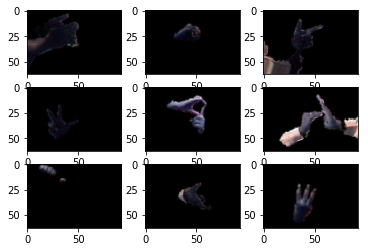

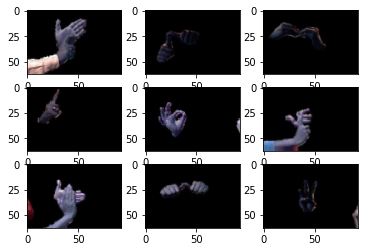

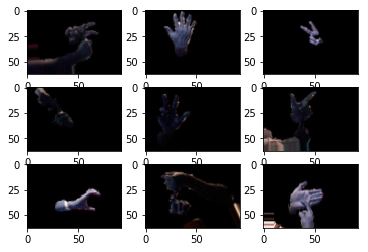

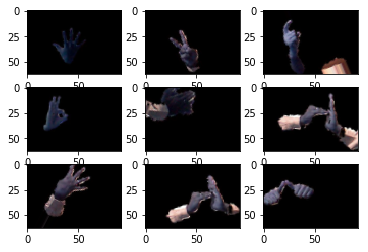

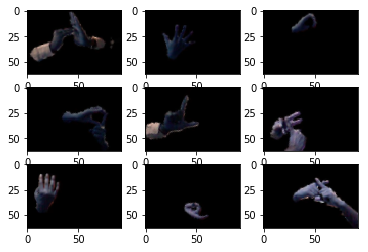

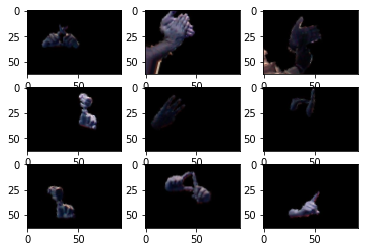

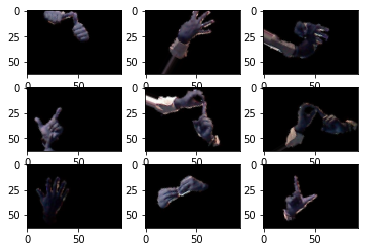

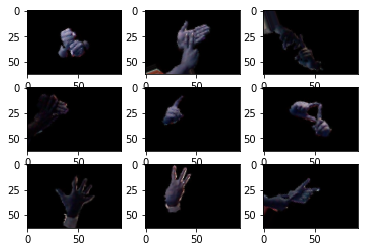

In [27]:
#visualise some of the augmented train images

for X_batch, y_batch in datagen1.flow(X_train_rgb1, Y_train_rgb1, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(63,93,3),cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break
    


for X_batch, y_batch in datagen2.flow(X_train_rgb2, Y_train_rgb2, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(63,93,3),cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

    
for X_batch, y_batch in datagen2.flow(X_train_rgb3, Y_train_rgb3, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(63,93,3),cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break
    


for X_batch, y_batch in datagen1.flow(X_train_rgb4, Y_train_rgb4, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(63,93,3),cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break    
    
#visualise some of the augmented test images

for X_batch, y_batch in datagen1.flow(X_test_rgb1, Y_test_rgb1, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(63,93,3),cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break
    

for X_batch, y_batch in datagen2.flow(X_test_rgb2, Y_test_rgb2, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(63,93,3),cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break
    

for X_batch, y_batch in datagen2.flow(X_test_rgb3, Y_test_rgb3, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(63,93,3),cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break
    

for X_batch, y_batch in datagen1.flow(X_test_rgb4, Y_test_rgb4, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(63,93,3),cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [28]:
#batch_size to train
batch_size = 36
# number of output classes
nb_classes = 36 #A-Z & 0-9
# number of epochs to train
nb_epoch = 20
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3




model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(X_train_rgb1.shape[1:])))
convout1 = Activation('relu')
model.add(convout1)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout3 = Activation('relu')
model.add(convout3)

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
opt = RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',  optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/paranjoy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(63, 93, 3...)`
/home/paranjoy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/paranjoy/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


In [29]:

hist1 = model.fit_generator(datagen1.flow(X_train_rgb1, Y_train_rgb1, batch_size=batch_size),
                 steps_per_epoch = len(X_train_rgb1) // (batch_size), epochs = nb_epoch,
                 verbose=1, validation_data = datagen1.flow(X_test_rgb1, Y_test_rgb1),
                 validation_steps = len(X_test_rgb1)//(batch_size), shuffle=True)


hist2 = model.fit_generator(datagen2.flow(X_train_rgb2, Y_train_rgb2, batch_size=batch_size),
                 steps_per_epoch = len(X_train_rgb2) // (batch_size), epochs = nb_epoch,
                 verbose=1, validation_data = datagen2.flow(X_test_rgb2, Y_test_rgb2),
                 validation_steps = len(X_test_rgb2)//(batch_size), shuffle=True)


hist3 = model.fit_generator(datagen2.flow(X_train_rgb3, Y_train_rgb3, batch_size=batch_size),
                 steps_per_epoch = len(X_train_rgb3) // (batch_size), epochs = nb_epoch,
                 verbose=1, validation_data = datagen2.flow(X_test_rgb3, Y_test_rgb3),
                 validation_steps = len(X_test_rgb3)//(batch_size), shuffle=True)


hist4 = model.fit_generator(datagen1.flow(X_train_rgb4, Y_train_rgb4, batch_size=batch_size),
                 steps_per_epoch = len(X_train_rgb4) // (batch_size), epochs = nb_epoch,
                 verbose=1, validation_data = datagen1.flow(X_test_rgb4, Y_test_rgb4),
                 validation_steps = len(X_test_rgb4)//(batch_size), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
514/514 [==============================] - 119s 232ms/step - loss: 3.2595 - acc: 0.1220 - val_loss: 2.8925 - val_acc: 0.1975
Epoch 2/20
514/514 [==============================] - 118s 230ms/step - loss: 2.9270 - acc: 0.1801 - val_loss: 2.6044 - val_acc: 0.2714
Epoch 3/20
514/514 [==============================] - 117s 228ms/step - loss: 2.6636 - acc: 0.2390 - val_loss: 2.3579 - val_acc: 0.3364
Epoch 4/20
514/514 [==============================] - 116s 226ms/step - loss: 2.4035 - acc: 0.2884 - val_loss: 2.0128 - val_acc: 0.4496
Epoch 5/20
514/514 [==============================] - 116s 226ms/step - loss: 2.1902 - acc: 0.3462 - val_loss: 1.8231 - val_acc: 0.4802
Epoch 6/20
514/514 [==============================] - 116s 226ms/step - loss: 2.0310 - acc: 0.3861 - val_loss: 1.6511 - val_acc: 0.5425
Epoch 7/20
514/514 [==============================] - 115s 223ms/step - loss: 1.8886 - acc: 0.4253 - val_loss: 1.5005 - val_acc: 0.5780


514/514 [==============================] - 114s 221ms/step - loss: 0.6493 - acc: 0.7929 - val_loss: 0.3975 - val_acc: 0.8929
Epoch 20/20
514/514 [==============================] - 114s 222ms/step - loss: 0.6514 - acc: 0.7924 - val_loss: 0.3824 - val_acc: 0.9005
Epoch 1/20
514/514 [==============================] - 114s 223ms/step - loss: 0.4335 - acc: 0.8574 - val_loss: 0.2014 - val_acc: 0.9536
Epoch 2/20
514/514 [==============================] - 114s 222ms/step - loss: 0.4194 - acc: 0.8635 - val_loss: 0.1949 - val_acc: 0.9572
Epoch 3/20
514/514 [==============================] - 114s 222ms/step - loss: 0.4183 - acc: 0.8645 - val_loss: 0.1958 - val_acc: 0.9491
Epoch 4/20
514/514 [==============================] - 111s 217ms/step - loss: 0.4017 - acc: 0.8683 - val_loss: 0.1706 - val_acc: 0.9619
Epoch 5/20
514/514 [==============================] - 112s 217ms/step - loss: 0.3965 - acc: 0.8722 - val_loss: 0.1844 - val_acc: 0.9555
Epoch 6/20
514/514 [==============================] - 111s

In [32]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 61, 91, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 61, 91, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 43, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 43, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 21, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 19, 32)        9248      
__________

In [30]:
#saving weights

model.save_weights("final_RGB_TRAIN_weights.hdf5",overwrite=True)
print('done1')
# save model and architecture to single file
model.save("final_RGB_MODEL_&_ARCHITECTURE.h5")
print('done2')

done1
done2


In [41]:
t1 = hist1.history['loss']
t2 = hist2.history['loss']
t3 = hist3.history['loss']
t4 = hist4.history['loss']
train_loss = t1 + t2 + t3 + t4
v1 = hist1.history['val_loss']
v2 = hist2.history['val_loss']
v3 = hist3.history['val_loss']
v4 = hist4.history['val_loss']
val_loss = v1 + v2 + v3 + v4
t1 = hist1.history['acc']
t2 = hist2.history['acc']
t3 = hist3.history['acc']
t4 = hist4.history['acc']
train_acc = t1 + t2 + t3 + t4
v1 = hist1.history['val_acc']
v2 = hist2.history['val_acc']
v3 = hist3.history['val_acc']
v4 = hist4.history['val_acc']
val_acc = v1 + v2 + v3 + v4

xc=range(nb_epoch*4)

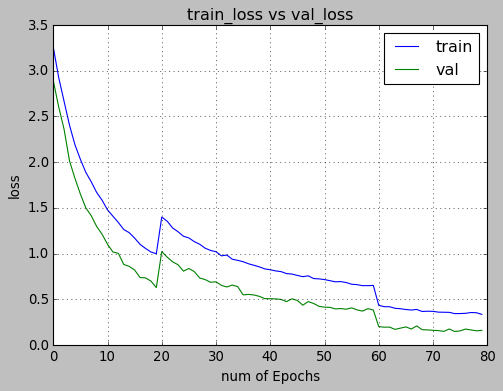

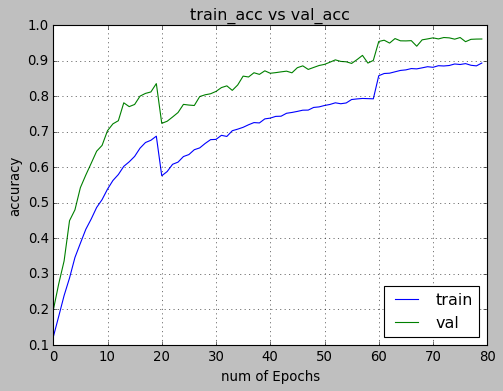

In [39]:
from matplotlib import pyplot as plt

#time to visualize the losses and accuracy

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(3,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

In [42]:
X_test_rgb = np.array( X_test_rgb, dtype=np.float32)

X_test_rgb = np.multiply(X_test_rgb, 1.0 / 255.0)


In [44]:
datagen = ImageDataGenerator(rotation_range = 35,
                             width_shift_range = 0.14, 
                             height_shift_range = 0.14,
                             #shear_range=0.01,
                             #zoom_range=0.2
                            )
datagen.fit(X_test_rgb)
print(X_test_rgb.shape[0:], 'test samples')

((9268, 63, 93, 3), 'test samples')


In [45]:
score = model.evaluate(X_test_rgb, Y_test_rgb, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(model.predict_classes(X_test_rgb[0:]))
print(Y_test_rgb[0:])

9268/9268 [==============================] - 22s 2ms/step
('Test score:', 0.0841499533300056)
('Test accuracy:', 0.985002157962883)
[ 9 23 23 ...  2  2  2]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [46]:
score = model.evaluate_generator(datagen.flow(X_test_rgb, Y_test_rgb), steps = len(X_test_rgb), verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(model.predict_classes(X_test_rgb[0:]))
print(Y_test_rgb[0:])

9268/9268 [==============================] - 741s 80ms/step
('Test score:', 0.26294703382096046)
('Test accuracy:', 0.9278571524796622)
[ 9 23 23 ...  2  2  2]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [47]:
# Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(X_test_rgb)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

print("-------------------------------------------------------------")
Y_pred = model.predict_generator(datagen.flow(X_test_rgb), steps = len(X_test_rgb), verbose=1)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[[1.70788995e-03 4.10003366e-07 5.08013545e-06 ... 3.66127961e-06
  1.07832275e-05 1.75538801e-08]
 [6.04844477e-04 2.70677347e-08 2.39438236e-06 ... 8.99375664e-06
  6.94751043e-06 7.94754662e-09]
 [8.71766952e-06 9.16738352e-11 1.19713139e-09 ... 2.16843020e-07
  9.38550727e-07 2.81388021e-11]
 ...
 [7.36800018e-07 1.26864052e-06 9.97759938e-01 ... 8.85949300e-13
  1.63851666e-07 5.06398829e-12]
 [4.64233779e-07 1.74086948e-03 9.91106331e-01 ... 5.80798254e-09
  4.08484484e-05 1.64234893e-06]
 [2.20870406e-05 4.46489721e-05 9.92740929e-01 ... 1.29499467e-09
  2.24701375e-06 2.87255597e-09]]
[ 9 23 23 ...  2  2  2]
-------------------------------------------------------------
9268/9268 [==============================] - 764s 82ms/step
[[5.5238244e-04 5.1231049e-03 9.8032607e-03 ... 1.2464445e-05
  1.0111767e-03 4.0002484e-05]
 [2.1845212e-03 1.1837254e-04 6.6484439e-01 ... 1.5307934e-07
  3.1504493e-05 1.1152048e-06]
 [9.3391864e-03 5.3450362e-06 1.6820693e-03 ... 2.3277896e-06
  3.95